# Hellman Analysis

First, let's see how many files we are working with. 

In [2]:
library(tidyverse)
library(gridExtra)

sot_filenames <- list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/")[!grepl("QC", list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/")) & grepl(".csv", list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/"))]
oft_filenames <- list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/OFT/")[grepl("_objdistance.csv", list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/OFT/"))]
print(paste("# of SOT files:", length(sot_filenames)))
print(paste("# of OFT files:", length(oft_filenames)))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




[1] "# of SOT files: 323"
[1] "# of OFT files: 278"


## OFT Summary
#### Lets look at the spread of Test Trial Performance within OFT. First we'll look at participant averages, then by trial, and then by object type.

In [3]:
test <- read.csv("/mnt/chrastil/lab/data/Hellman/GoogleDrive/OFT/A10XW6SNPNQX16_Y5Q5V9VL_objdistance.csv")
test

chFolding.A_LOD0,LearnTrial.01,X98600,X.950,X0,X98540.65,X.867.9651,X7.999979,X101.2586,X2.185696,X242.2907,X53.112,X171.9934,X134.7449,X102.6499,X1.675534,X9844.173
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Soccer Ball,LearnTrial 02,98600.0,-950.0,0,98687.17,-833.6259,48.200020,145.40570,3.589308,265.0567,19.176010,147.18630,102.56950,148.3084,0.99243430,30442.470000
Bucket_clean,LearnTrial 03,98600.0,-950.0,0,98683.69,-1058.1020,140.400000,136.71370,4.119116,284.0187,17.758000,137.78220,267.17960,139.6364,0.98672100,9.322070
cone_clean,LearnTrial 04,98600.0,-950.0,0,98429.20,-1009.1790,241.000000,180.76140,4.566199,317.7407,32.237000,182.58310,177.37810,185.2323,0.98569800,6.200364
chFolding.A_LOD0,PracticeTrial 01,98600.0,-950.0,0,98539.09,-869.1256,342.800000,101.24820,3.767671,399.7170,58.690340,558.40110,927.93230,102.6499,5.43985900,10.040420
Soccer Ball,PracticeTrial 02,98600.0,-950.0,0,98686.99,-833.6812,54.599980,145.25380,3.747220,437.7150,36.545990,188.79010,1515.75800,148.3084,1.27295600,5.584698
Bucket_clean,PracticeTrial 03,98600.0,-950.0,0,98682.87,-1060.8090,95.999950,138.37150,4.196762,458.1780,19.829010,182.98880,475.55430,139.6364,1.31046700,11.065720
cone_clean,PracticeTrial 04,98600.0,-950.0,0,98427.86,-1010.1260,254.800000,182.34170,3.026170,493.9383,33.122310,185.38060,156.78850,185.2323,1.00080000,6.173635
cone_clean,TestScene 23,98786.0,-840.0,180,98798.36,-896.6479,171.800000,57.98877,390.387500,543.0993,14.067990,59.38188,351.74920,399.3521,0.14869550,5.178888
cone_clean,TestScene 24,98740.6,-1046.0,270,98699.80,-1087.2780,157.600000,58.05025,285.143400,552.7933,9.694031,102.38380,123.59610,317.4759,0.32249310,15.438620


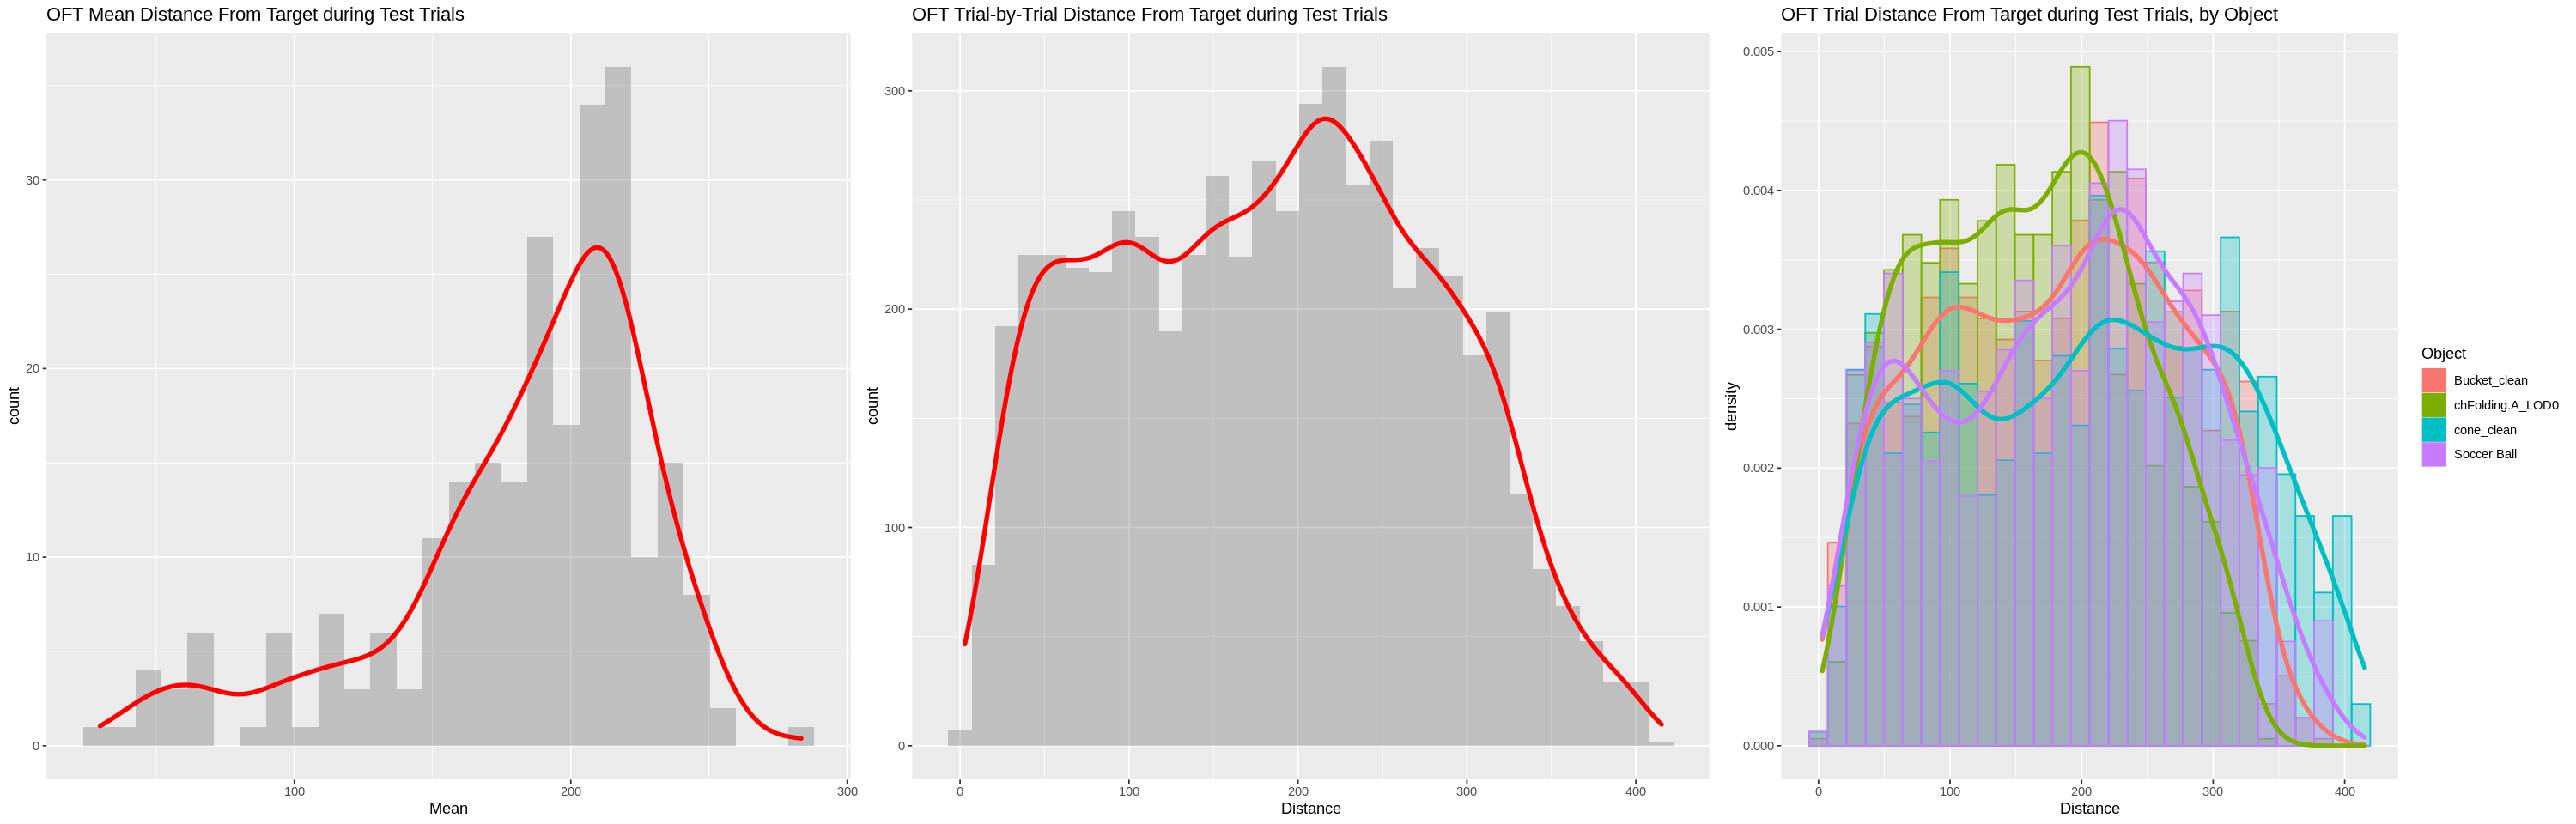

In [4]:
oft_mean_performances <- c()
oft_trial_performances <- c()
oft_object_types <- c()
oft_sd_performances <- c()

options(warn=-1)

for (i in 1:length(oft_filenames)){
    file <- read.csv(paste0("/mnt/chrastil/lab/data/Hellman/GoogleDrive/OFT/", oft_filenames[i]), header = FALSE)
    file <- file[grepl("Test", file$V2), ]
    oft_mean_performances <- c(oft_mean_performances,  mean(file$V10))
    oft_sd_performances <- c(oft_sd_performances, sd(file$V10))
    oft_trial_performances <- c(oft_trial_performances, file$V10)
    oft_object_types <- c(oft_object_types, as.character(file$V1))
}


summary_OFT <- data.frame(Mean = oft_mean_performances, SD = oft_sd_performances)
summary_OFT_trial <- data.frame(Distance = oft_trial_performances, Object = oft_object_types)

oftmean <- ggplot(summary_OFT, aes(x = Mean)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_OFT$Mean, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_OFT$Mean, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("OFT Mean Distance From Target during Test Trials")

ofttbt <- ggplot(summary_OFT_trial, aes(x = Distance)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_OFT_trial$Distance, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_OFT_trial$Distance, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("OFT Trial-by-Trial Distance From Target during Test Trials")

ofttbtobject <- ggplot(summary_OFT_trial, aes(x = Distance, y = ..density..)) +
  geom_histogram(aes(color = Object, fill = Object), alpha = 0.3, bins = 30, position = 'identity') +
  geom_density(size = 1.5, aes(color = Object)) +
  ggtitle("OFT Trial Distance From Target during Test Trials, by Object")

options(repr.plot.width=25, repr.plot.height=8)

grid.arrange(oftmean, ofttbt, ofttbtobject, ncol = 3)
options(warn=1)

## SOT Summary
#### Next lets look at the spread of Test Trial Performance within SOT. First we'll look at participant averages and  by trial, for both Angular Error and Reaction Times.

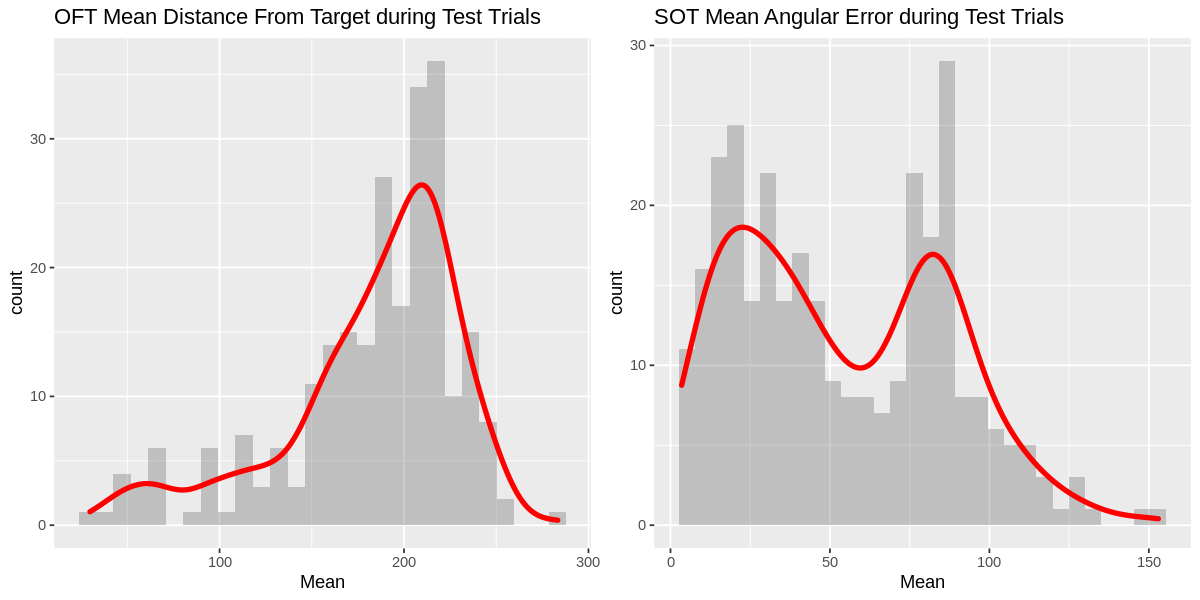

In [15]:
sot_mean_performances <- c()
sot_trial_performances <- c()
sot_trial_reactiontimes <- c()
sot_sd_performances <- c()
sot_mean_rt <- c()

options(warn=-1)

for (i in 1:length(sot_filenames)){
    
    file <- read.csv(paste0("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/", sot_filenames[i]))
    file <- file[grepl("Test", file$trialType), ]
    sot_mean_performances <- c(sot_mean_performances,  mean(file$angularError, na.rm = TRUE))
    sot_sd_performances <- c(sot_sd_performances, sd(file$angularError, na.rm = TRUE))
    sot_trial_performances <- c(sot_trial_performances, file$angularError)
    sot_trial_reactiontimes <- c(sot_trial_reactiontimes, file$reactionTime)
    sot_mean_rt <- c(sot_mean_rt, mean(file$reactionTime, na.rm = TRUE))
}


summary_SOT <- data.frame(Mean = sot_mean_performances, SD = sot_sd_performances, Mean_RT = sot_mean_rt)
summary_SOT_trial <- data.frame(Error = sot_trial_performances, RT = sot_trial_reactiontimes)

sotmean <- ggplot(summary_SOT, aes(x = Mean)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT$Mean, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_SOT$Mean, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("SOT Mean Angular Error during Test Trials")

sottbt <- ggplot(summary_SOT_trial, aes(x = Error)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT_trial$Error) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_SOT_trial$Error) / 30)), size = 1.5, color = "red") +
  ggtitle("SOT Trial-by-Trial Angular Error during Test Trials")

sottbtrt <- ggplot(summary_SOT_trial, aes(x = RT)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT_trial$RT / 30, na.rm = TRUE)) +
  geom_density(aes(y = ..count.. * (max(summary_SOT_trial$RT, na.rm = TRUE) / 30)), size = 1.5, color = 'red') +
  ggtitle("SOT Trial-by-Trial Reaction Times during Test Trials")

sotmeanrt <- ggplot(summary_SOT, aes(x = Mean_RT)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT$Mean_RT, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_SOT$Mean_RT, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("SOT Mean Reaction Time during Test Trials")

options(repr.plot.width=10, repr.plot.height=5)

grid.arrange(oftmean, sotmean, ncol = 2)
options(warn=1)